In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
from IPython import display
from ipywidgets import interact, widgets
%matplotlib inline

In [2]:
data = pd.read_csv('data/NO2_hors_Paris.csv')
data

,departement,X,Y,Année,Valeur
0,75,2.290811,48.842157,2012,41.316912
1,75,2.405807,48.875666,2012,63.683878
2,75,2.332706,48.866140,2012,41.507336
3,75,2.347347,48.866889,2012,45.197342
4,75,2.364801,48.856970,2012,40.109546
...,...,...,...,...,...
75175,92,2.169196,48.843135,2017,22.381235
75176,92,2.168477,48.877698,2017,23.277292
75177,92,2.266671,48.806425,2017,27.989549
75178,92,2.262114,48.887357,2017,33.622643


In [3]:
#CREATE REGIONS
data['Région']='NE'
data.loc[ (data.X<=data.X.mean()) & (data.Y>=data.Y.mean()) , 'Région']= 'NO'
data.loc[ (data.X>data.X.mean()) & (data.Y<data.Y.mean())  , 'Région']= 'SE'
data.loc[ (data.X<=data.X.mean()) & (data.Y<data.Y.mean())  , 'Région']= 'SO'

In [4]:
# SAMPLING DATA WITH CONDITIONS
# exclusion of all central regions (value to high)
# keep only one year values to avoid duplicate
data_cond = data.loc[(data.departement!=75) & (data.departement!=93) & (data.departement!=92) & 
                     (data.departement!=94) & (data.Année == 2012)].sample(40)[['X','Y']]
data_cond.head()

,X,Y
3978,1.854198,48.958689
2511,2.654052,48.850001
12383,2.274507,48.730975
8529,2.275383,48.961890
11934,2.332484,49.139289


In [5]:
# CREATE NEW SMALLER DATAFRAME FROM SELECTED SAMPLE
data_mini = data.loc[(data.X.isin(data_cond.X)) & (data.Y.isin(data_cond.Y))].copy()
data_mini

,departement,X,Y,Année,Valeur,Région
1305,77,3.335842,48.863738,2012,12.487663,NE
1589,77,2.904868,48.942218,2012,18.948748,NE
1805,77,2.735361,48.408129,2012,11.821519,SE
1916,77,2.946375,48.381508,2012,9.225265,SE
2503,77,2.703973,48.841625,2012,26.291289,NE
...,...,...,...,...,...,...
75001,91,2.334391,48.634042,2017,28.026513,SO
75006,91,2.188694,48.698896,2017,19.711735,SO
75033,91,2.274507,48.730975,2017,22.525241,SO
75059,91,2.188694,48.698896,2017,19.711735,SO


In [6]:
#NORMALISATION OF ALL VALUES BETWEEN [min max]
data_mini['Valeur'] = data_mini['Valeur'] - data_mini['Valeur'].min()
data_mini['Valeur'] = data_mini['Valeur'] / data_mini['Valeur'].max()
data_mini 

,departement,X,Y,Année,Valeur,Région
1305,77,3.335842,48.863738,2012,0.147676,NE
1589,77,2.904868,48.942218,2012,0.300652,NE
1805,77,2.735361,48.408129,2012,0.131904,SE
1916,77,2.946375,48.381508,2012,0.070434,SE
2503,77,2.703973,48.841625,2012,0.474497,NE
...,...,...,...,...,...,...
75001,91,2.334391,48.634042,2017,0.515581,SO
75006,91,2.188694,48.698896,2017,0.318716,SO
75033,91,2.274507,48.730975,2017,0.385330,SO
75059,91,2.188694,48.698896,2017,0.318716,SO


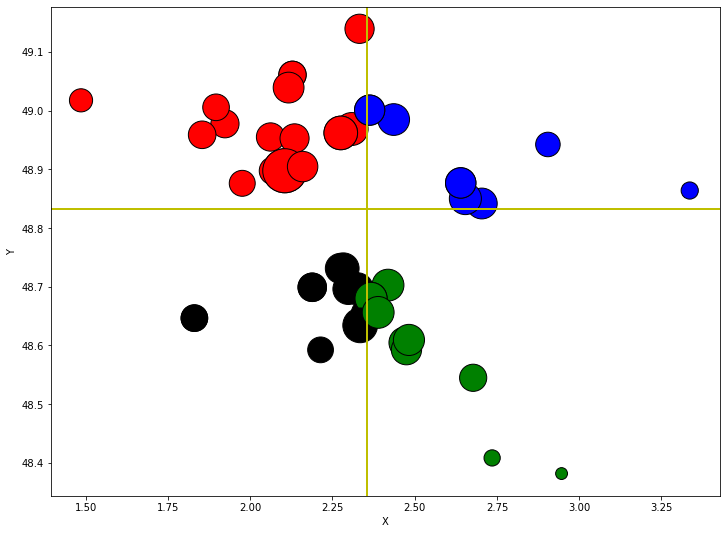

In [7]:
# DEFINE FUNCTION THAT WILL PLOT DATA FOR A SPECIFIC YEAR 
def plotyear(aaaa):
    # SELECT YEAR
    data_to_plot  = data_mini[data_mini.Année == aaaa ]
    # RESIZE VALUE TO GET READABLE CIRCLE SIZE
    area = 2000 * data_to_plot.Valeur
    # DEFINE COLOR DICT FOR EACH REGION
    colors = data_to_plot.Région.map({'NO': 'r', 'NE': 'b', 'SE': 'g', 'SO': 'k'}) 
    
    data_to_plot.plot.scatter('X','Y',
                      s=area,c=colors,
                      linewidths=1,edgecolors='k',
                      figsize=(12,9))
    # ADDING LINES FROM MEAN POSITION VALUE
    pp.axvline(data.X.mean(),c='y', linewidth=2, linestyle='-')
    pp.axhline(data.Y.mean(),c='y', linewidth=2, linestyle='-')
    pp.xlabel('X')
    pp.ylabel('Y')

# EXAMPLE 2012
plotyear(2012)

In [8]:
# DEFINE A SLIDER WIDGET TO CREATE AN INTERRACTIVE PLOT
interact(plotyear,aaaa=widgets.IntSlider(min=2012,max=2017,step=1,value=2012))

interactive(children=(IntSlider(value=2012, description='aaaa', max=2017, min=2012), Output()), _dom_classes=(…

<function __main__.plotyear(aaaa)>